In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd

from matplotlib import pyplot as plt
from plot_shift.correlation_plot import correlation_plot, get_correlations

from mads_telemarketing_assignment.config import (
    APPROACHED_DATA_FILENAME,
    BINARY_FEATURES,
    CATEGORICAL_FEATURES,
    DATA_FILENAME,
    HONOLULU_BLUE,
    IMPERIAL_RED,
    INTERIM_DATA_DIR,
    NOT_APPROACHED_DATA_FILENAME,
    NUMERICAL_FEATURES,
    PERSIAN_GREEN,
    PROCESSED_DATA_DIR,
    RAW_DATA_DIR,
    SELECTED_YEAR,
)
from mads_telemarketing_assignment.utils import print_unique_values
from mads_telemarketing_assignment.visualization import binary_feature_plot, categorical_feature_plot, numerical_feature_plot

In [2]:
# Various configurations
plt.style.use("seaborn-v0_8-darkgrid")

In [3]:
# Make sure you have downloaded the data file from
# https://archive.ics.uci.edu/static/public/222/bank+marketing.zip, extracted
# all files and placed the `bank-additional-full.csv` in the `data/raw`
# directory.
df = pd.read_csv(RAW_DATA_DIR / DATA_FILENAME, sep=";")

In [4]:
# Display shape of dataset
df.shape

(41188, 21)

In [5]:
# Display type information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
# Display statistics of continuous variables
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
# Display first few rows of dataset
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
# Check for any NaN values
df.isna().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [9]:
# Seems like no calls are made in the months of January and February for all
# years.
print_unique_values(df, CATEGORICAL_FEATURES)

contact
cellular     0.634748
telephone    0.365252
Unique values: 2

day_of_week
fri    0.190031
mon    0.206711
thu    0.209357
tue    0.196416
wed    0.197485
Unique values: 5

default
no         0.791201
unknown    0.208726
yes        0.000073
Unique values: 3

education
basic.4y               0.101389
basic.6y               0.055647
basic.9y               0.146766
high.school            0.231014
illiterate             0.000437
professional.course    0.127294
university.degree      0.295426
unknown                0.042027
Unique values: 8

housing
no         0.452122
unknown    0.024036
yes        0.523842
Unique values: 3

job
admin.           0.253035
blue-collar      0.224677
entrepreneur     0.035350
housemaid        0.025736
management       0.070992
retired          0.041760
self-employed    0.034500
services         0.096363
student          0.021244
technician       0.163713
unemployed       0.024619
unknown          0.008012
Unique values: 12

loan
no         0.824269
unkn

In [10]:
# There seems to be a relative big imbalance in the target variable.
print_unique_values(df, BINARY_FEATURES)

y
no     0.887346
yes    0.112654
Unique values: 2



In [11]:
# The description of the dataset that the order of the instances are time based
# - starting from May 2008. However, the dataset does not contain a timestamp
# feature, so we need to extract that information from the 'month' feature.
current_year = 2008
years = []
months_order = [
    "jan",
    "feb",
    "mar",
    "apr",
    "may",
    "jun",
    "jul",
    "aug",
    "sep",
    "oct",
    "nov",
    "dec",
]
month_to_index = {month: idx for idx, month in enumerate(months_order)}
previous_month_index = month_to_index[df.loc[0, "month"]]

for month in df["month"]:
    month_idx = month_to_index[month]
    if month_idx < previous_month_index:
        current_year += 1
    years.append(current_year)
    previous_month_index = month_idx

df["year"] = years

In [12]:
print_unique_values(df, "year")

year
2008    0.672283
2009    0.277751
2010    0.049966
Unique values: 3



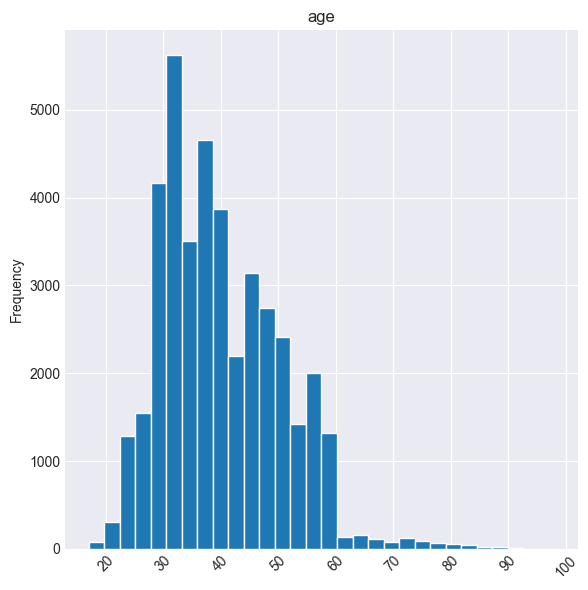

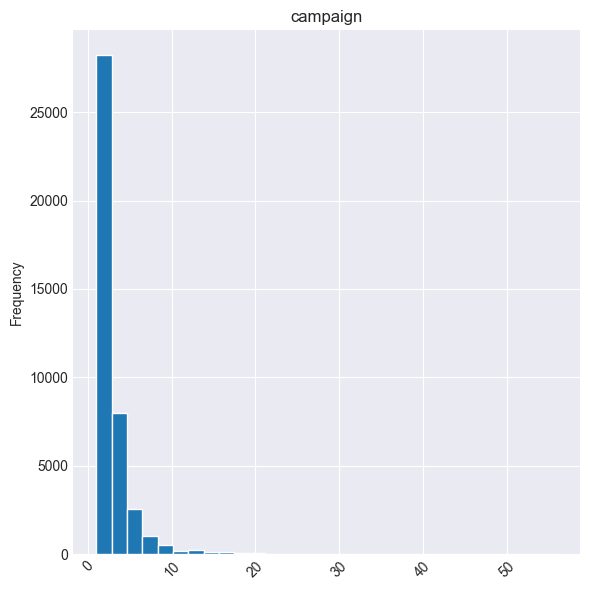

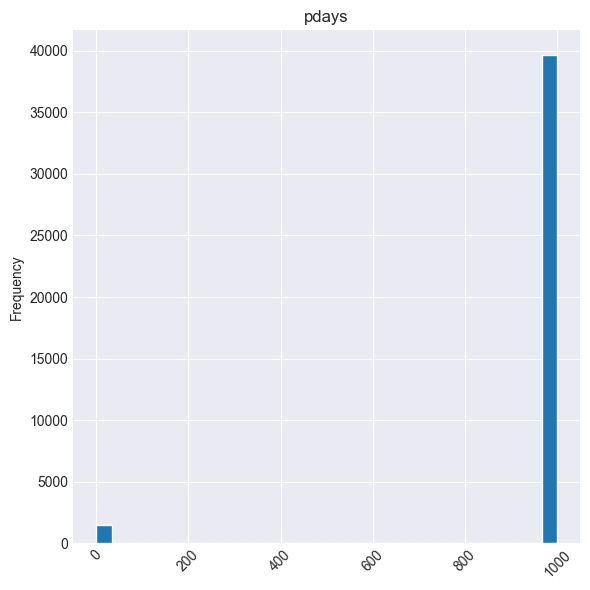

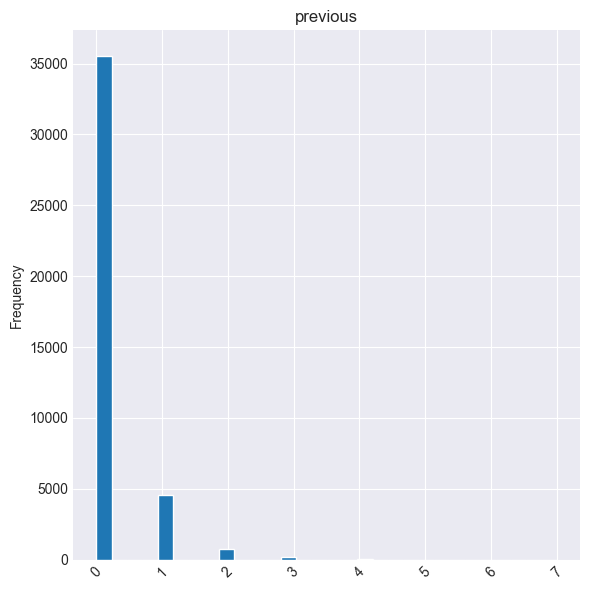

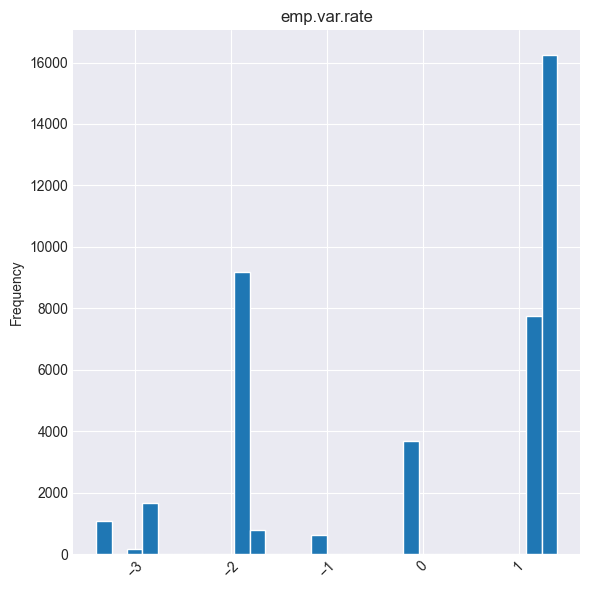

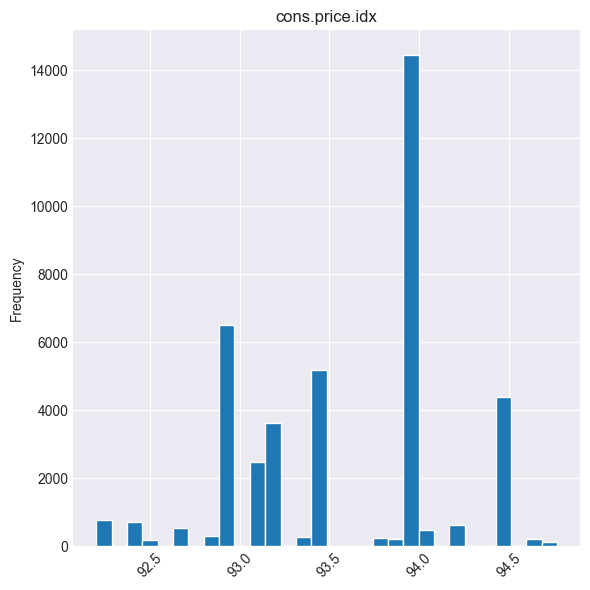

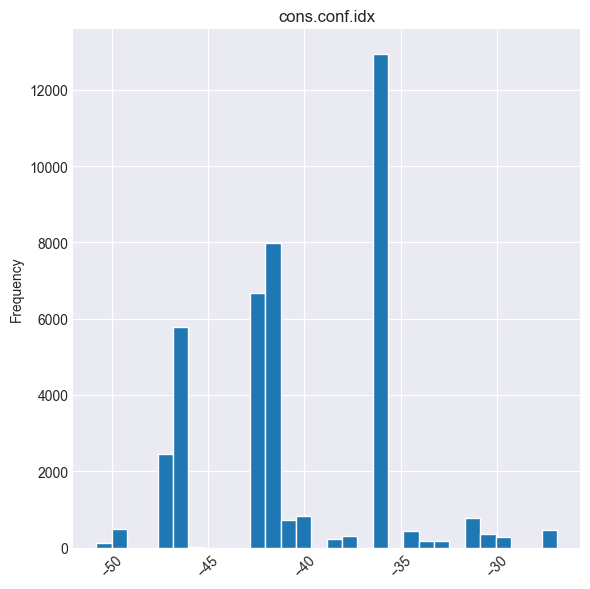

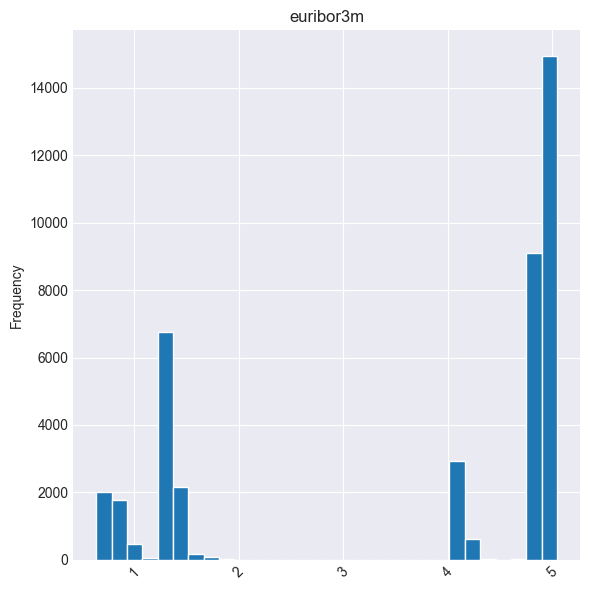

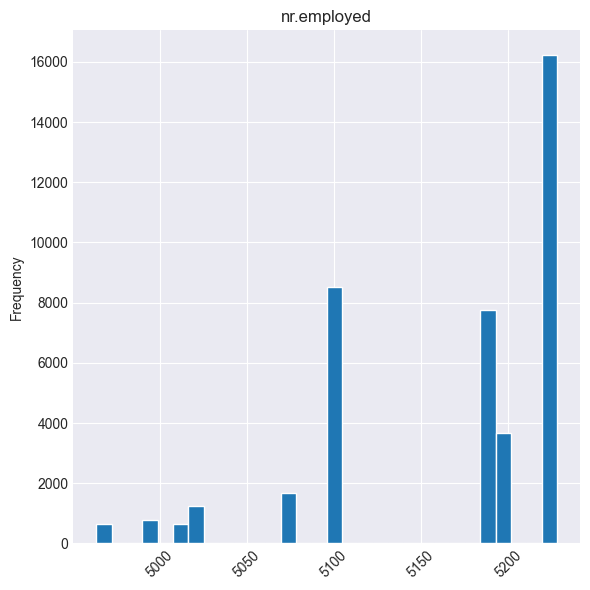

In [13]:
for feature in NUMERICAL_FEATURES:
    numerical_feature_plot(df[feature], feature)

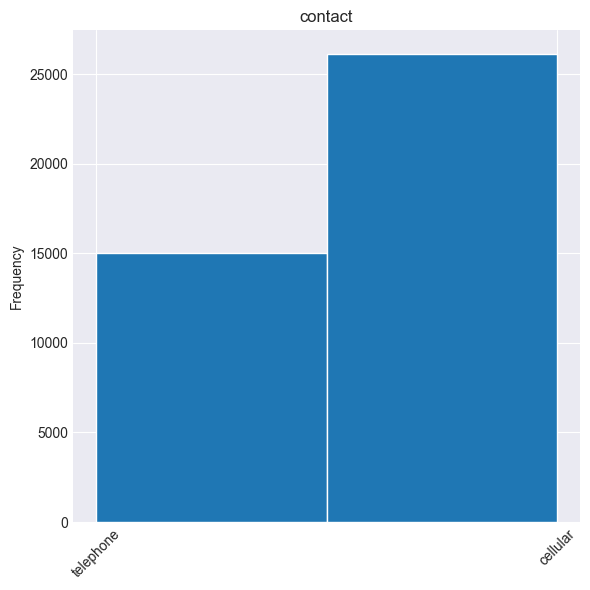

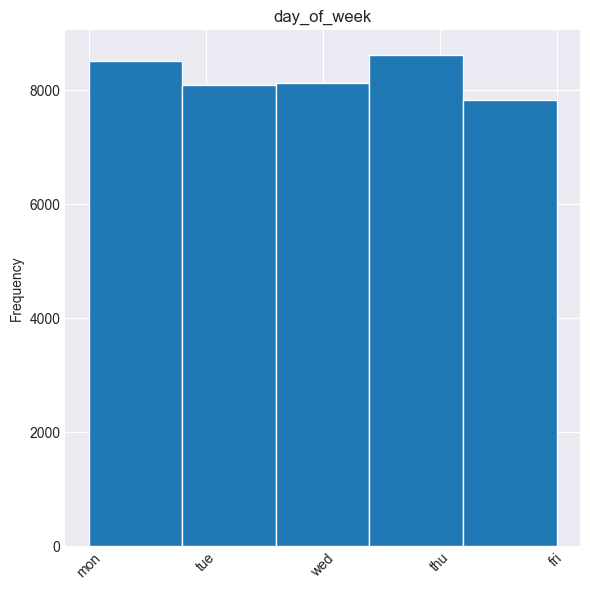

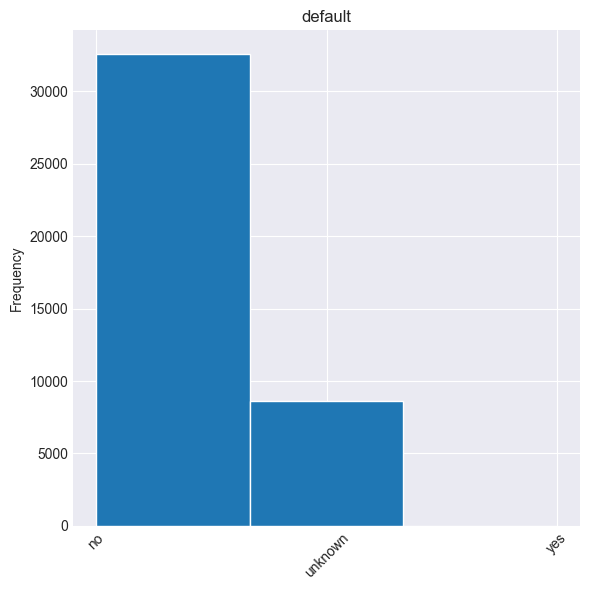

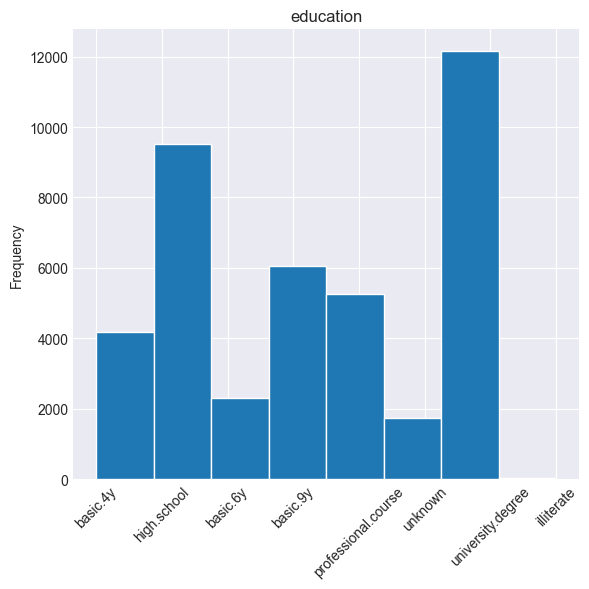

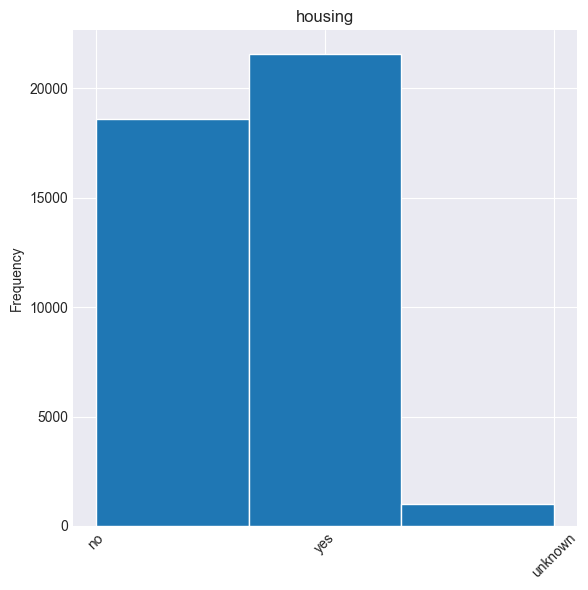

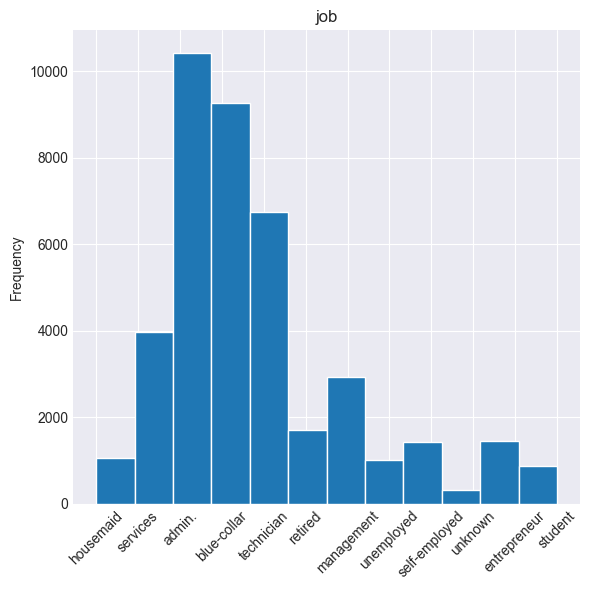

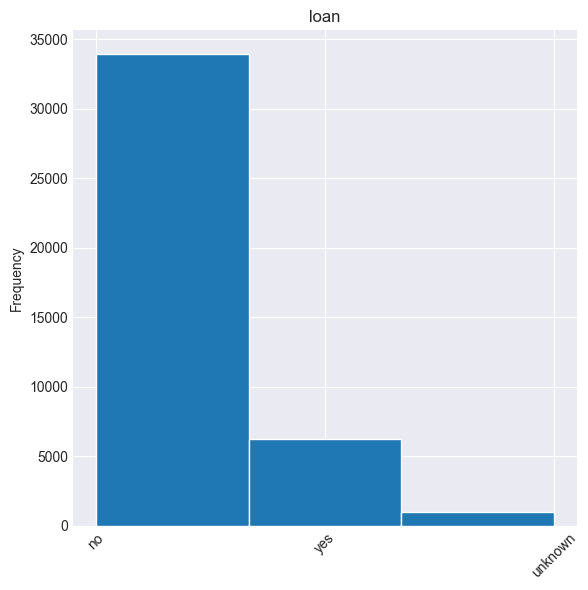

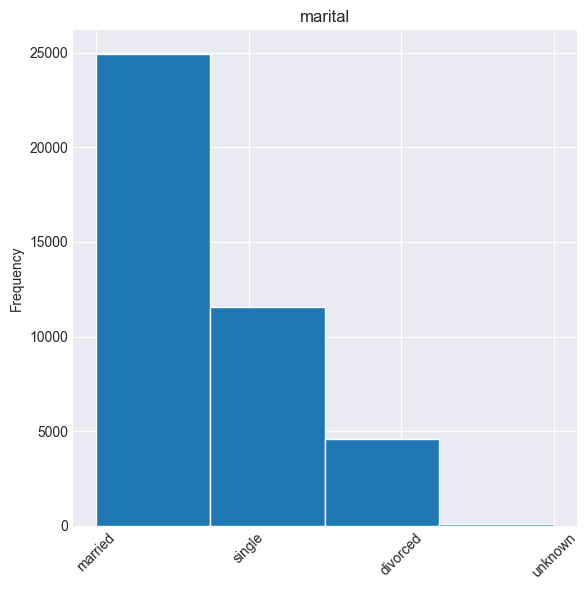

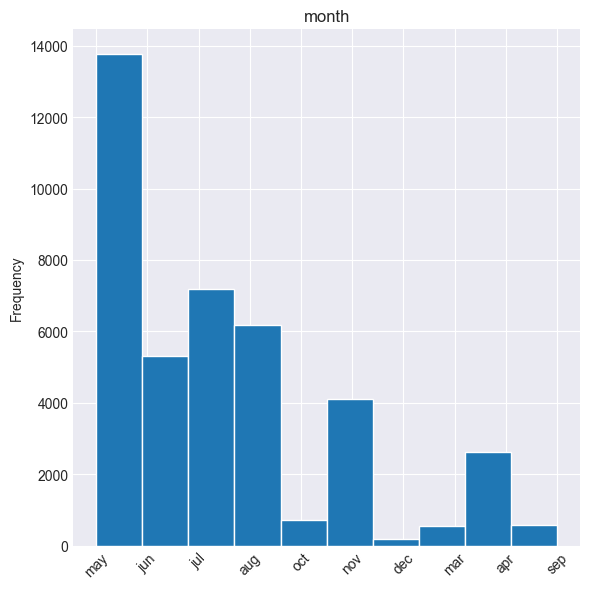

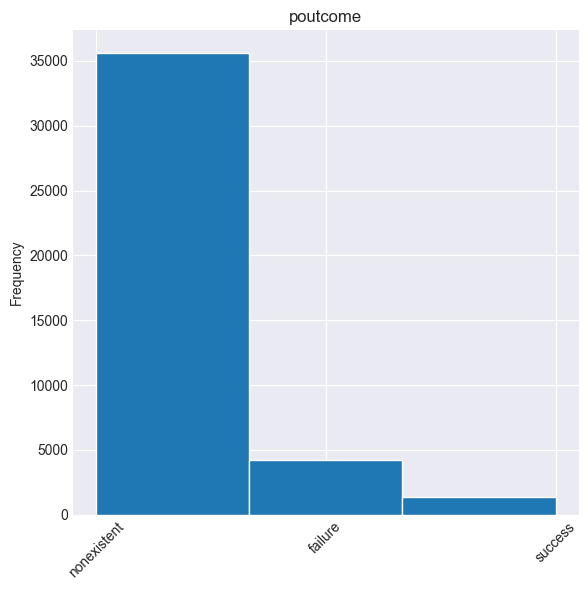

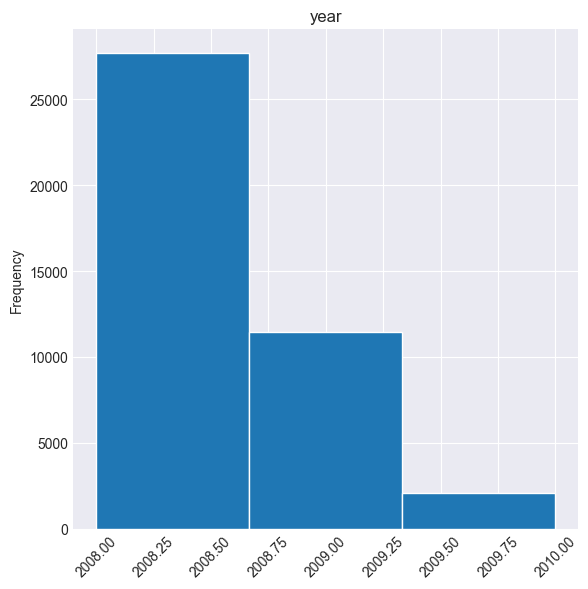

In [14]:
for feature in CATEGORICAL_FEATURES:
    categorical_feature_plot(df[feature], feature)

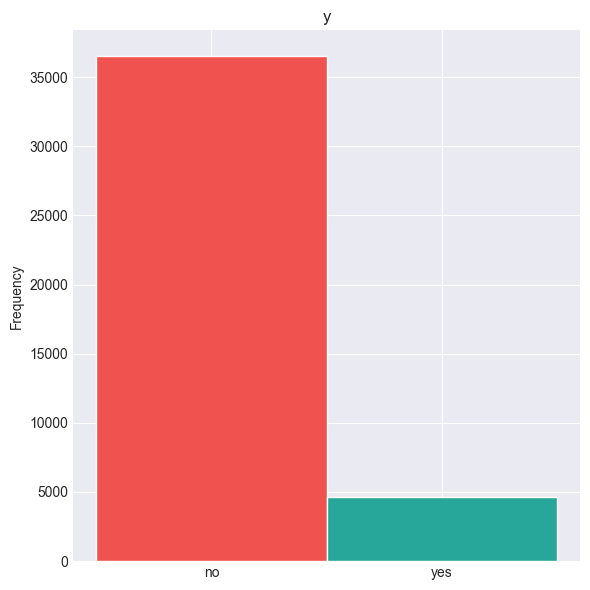

In [15]:
for feature in BINARY_FEATURES:
    binary_feature_plot(df[feature], feature)

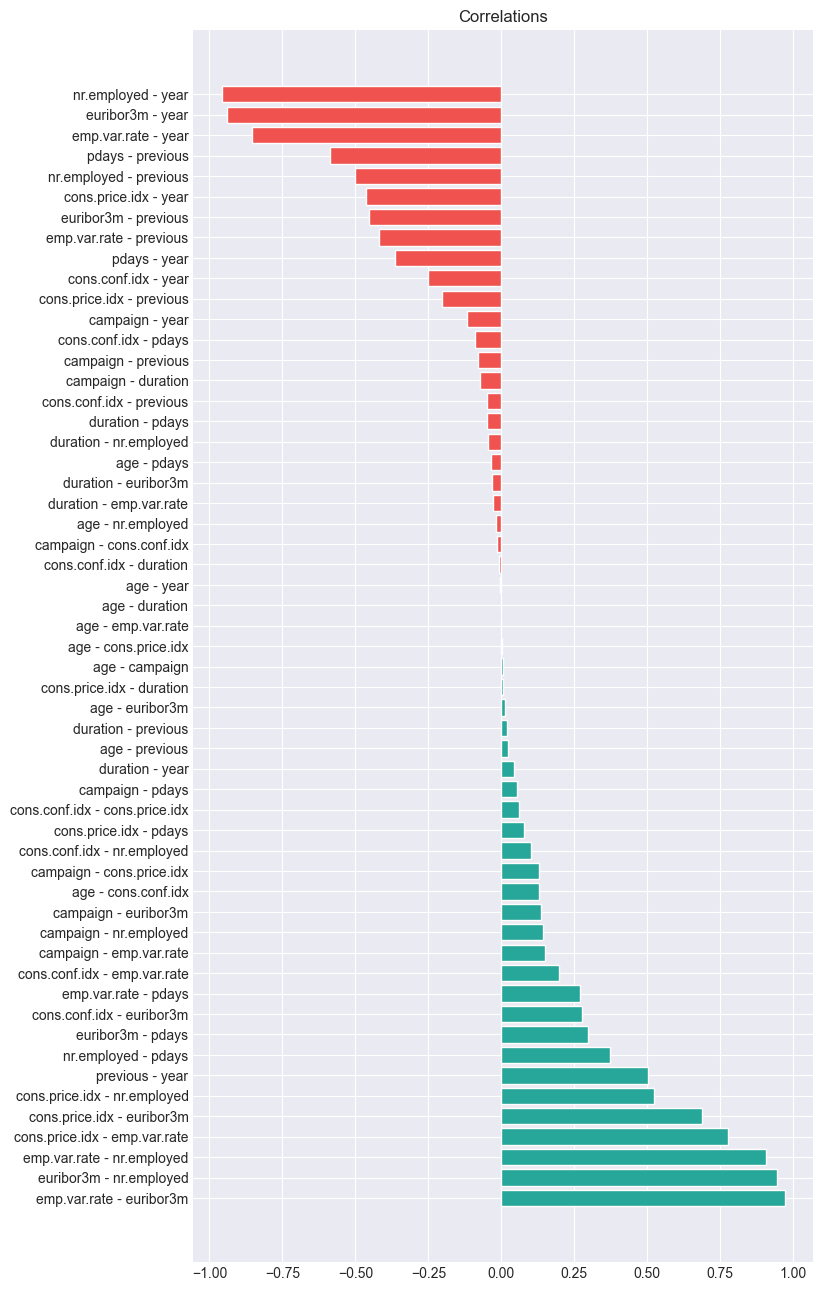

In [16]:
# Plot correlations per feature pair
correlations = get_correlations(df)
_, ax = plt.subplots(figsize=(8, 16))
correlation_plot(correlations, ax=ax)

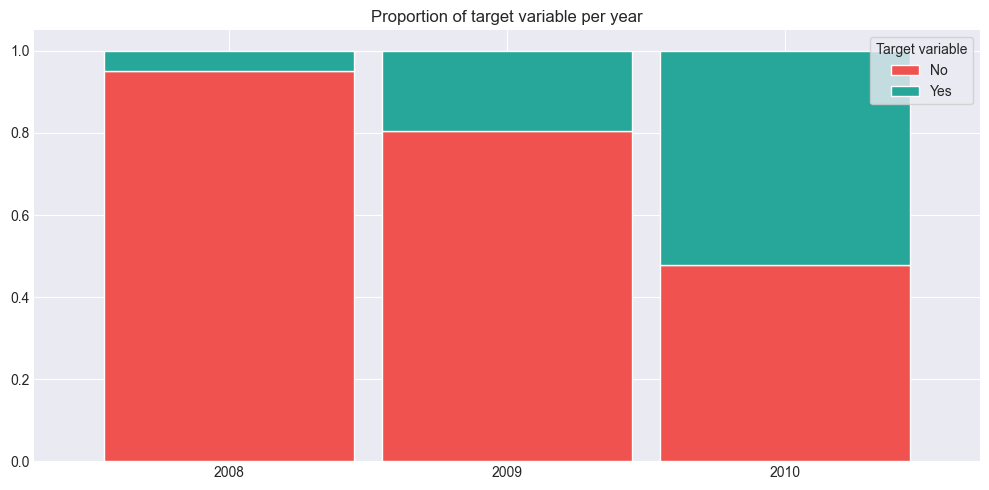

In [24]:
df.groupby(["year", "y"]).size().unstack().div(df.groupby("year").size(), axis=0).plot(
    color=[IMPERIAL_RED, PERSIAN_GREEN],
    edgecolor="white",
    figsize=(10, 5),
    kind="bar",
    stacked=True,
    width=0.9,
)

plt.title("Proportion of target variable per year")
plt.xlabel("")
plt.xticks(rotation=0)
plt.legend(
    title="Target variable",
    labels=["No", "Yes"],
    frameon=True,
)
plt.tight_layout()
plt.show()

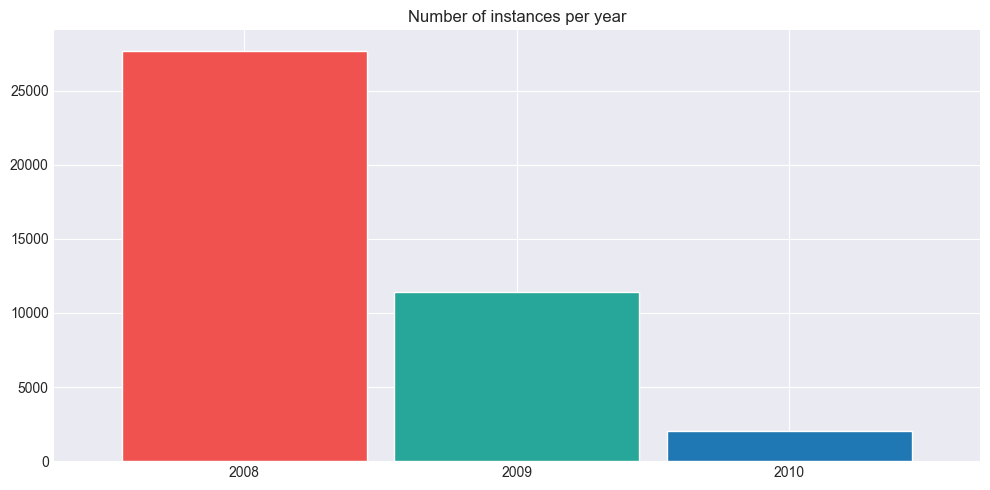

In [22]:
df.groupby("year").size().plot(
    kind="bar",
    stacked=True,
    figsize=(10, 5),  # Reduced height from 6 to 4
    color=[IMPERIAL_RED, PERSIAN_GREEN, HONOLULU_BLUE],
    edgecolor="white",
    width=0.9,
)
plt.title("Number of instances per year")
plt.xticks(rotation=0)
plt.xlabel("")
plt.tight_layout()
plt.show()

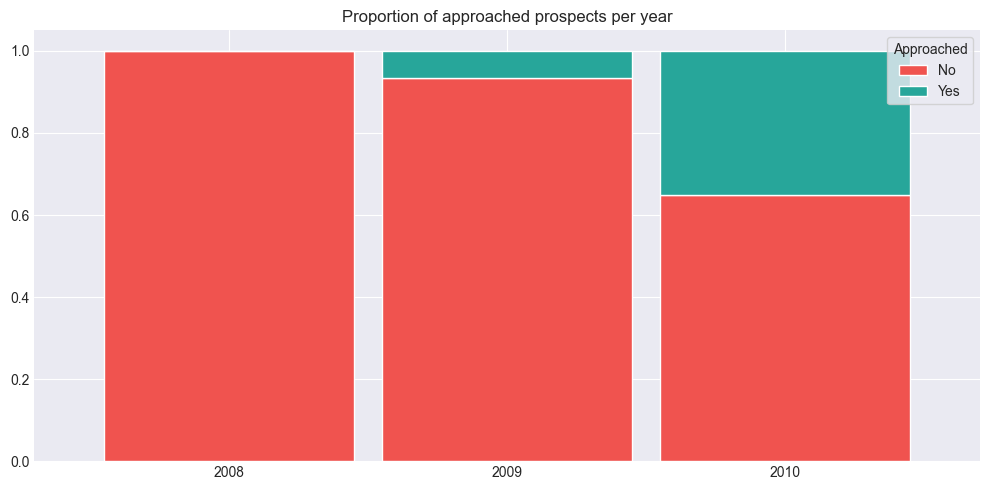

In [23]:
df["approached"] = df["pdays"] != 999

df.groupby(["year", "approached"]).size().unstack().div(df.groupby("year").size(), axis=0).plot(
    color=[IMPERIAL_RED, PERSIAN_GREEN],
    edgecolor="white",
    figsize=(10, 5),
    kind="bar",
    stacked=True,
    width=0.9,
)

plt.title("Proportion of approached prospects per year")
plt.xlabel("")
plt.xticks(rotation=0)
plt.legend(
    title="Approached",
    labels=["No", "Yes"],
    frameon=True,
)
plt.tight_layout()
plt.show()


In [20]:
# Save processed DataFrame to CSV file
df.to_csv(PROCESSED_DATA_DIR / DATA_FILENAME, index=False)